In [0]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd
import glob
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Cargamos datos del paciente 1
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_setA/p000001.psv',sep='|')

In [0]:
#Mostramos variables del paciente 1
df.head(52)
def displaydf(dataframe, cols = None, rows = 54):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

displaydf(df)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0


True

In [0]:
#Reemplazamos los valores perdidos con la media de la columna
#Para las variables con todos sus valores perdidos, los reemplazaremos con 0
dF2 = df.fillna(df.mean())
df3 = df2.fillna(0)
display(df3)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.571429,91.477273,36.778,126.809524,87.261905,0.0,24.82,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,1,0
1,97.000000,95.000000,36.778,98.000000,75.330000,0.0,19.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,2,0
2,89.000000,99.000000,36.778,122.000000,86.000000,0.0,22.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,3,0
3,90.000000,95.000000,36.778,126.809524,87.261905,0.0,30.00,0.0,24.000000,46.5,0.2825,7.360000,100.000000,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,4,0
4,103.000000,88.500000,36.778,122.000000,91.330000,0.0,24.50,0.0,20.714286,46.5,0.2800,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,5,0
5,110.000000,91.000000,36.778,126.809524,87.261905,0.0,22.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,6,0
6,108.000000,92.000000,36.110,123.000000,77.000000,0.0,29.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,7,0
7,106.000000,90.500000,36.778,93.000000,76.330000,0.0,29.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,8,0
8,104.000000,95.000000,36.778,133.000000,88.330000,0.0,26.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,9,0
9,102.000000,91.000000,36.778,134.000000,87.330000,0.0,30.00,0.0,20.714286,46.5,0.2825,7.347143,95.333333,86.5,16.0,18.0,98.0,9.45,85.0,0.7,0.0,163.0,0.0,2.1,3.5,4.2,0.3,0.0,36.7,12.35,0.0,10.2,0.0,327.5,83.14,0,0.0,0.0,-0.03,10,0


In [0]:
#Normalizamos los datos según la normalización min-max
  #from sklearn.preprocessing import MinMaxScaler
  #scaler = MinMaxScaler()
  #df3 = scaler.fit_transform(df_zero)

In [0]:
#Guardamos nombres de las columnas divididos en tres tipos de variables: signos vitales, valores de lab y datos demográficos

#VITAL SIGNS
HR=df3['HR']
O2Sat=df3['O2Sat']
Temp=df3['Temp']
SBP=df3['SBP']
MAP=df3['MAP']
DBP=df3['DBP']
Resp=df3['Resp']
EtCO2=df3['EtCO2']

#LABORATORY VALUES
BaseExcess=df3['BaseExcess']
HCO3=df3['HCO3']
FiO2=df3['FiO2']
pH=df3['pH']
PaCO2=df3['PaCO2']
Sa02=df3['SaO2']
AST=df3['AST']
BUN=df3['BUN']
Alkalinephos=df3['Alkalinephos']
Calcium=df3['Calcium']
Chloride=df3['Chloride']
Creatinine=df3['Creatinine']
Bilirubin_direct=df3['Bilirubin_direct']
Glucose=df3['Glucose']
Lactate=df3['Lactate']
Magnesium=df3['Magnesium']
Phosphate=df3['Phosphate']
Potassium=df3['Potassium']
Bilirubin_total=df3['Bilirubin_total']
TroponinI=df3['TroponinI']
Hct=df3['Hct']
Hgb=df3['Hgb']
PTT=df3['PTT']
WBC=df3['WBC']
Fibrinogen=df3['Fibrinogen']
Platelets=df3['Platelets']

#DEMOGRAPHICS
Age=df3['Age']
Gender=df3['Gender']
Unit1=df3['Unit1']
Unit2=df3['Unit2']
HospAdmTime=df3['HospAdmTime']
ICULOS=df3['ICULOS']

#Outcome
SepsisLabel=df3['SepsisLabel']

In [0]:
#Mostrar media de cada variable
value_list=[HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,Sa02,AST,BUN,
      Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,
      PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel]

name_list = ["HR","O2Sat","Temp","SBP","MAP","DBP","Resp","EtCO2","BaseExcess","HCO3","FiO2","pH","PaCO2",
             "Sa02","AST","BUN", "Alkalinephos","Calcium","Chloride","Creatinine","Bilirubin_direct","Glucose",
             "Lactate","Magnesium","Phosphate","Potassium","Bilirubin_total","TroponinI","Hct","Hgb","PTT","WBC",
             "Fibrinogen","Platelets","Age","Gender","Unit1","Unit2","HospAdmTime","ICULOS","SepsisLabel"]

mean_list=[]
for i in range(len(value_list)):
    mean_list.append(value_list[i].mean())
    print("Valor medio de:", name_list[i], "es", mean_list[i])

Valor medio de: HR es 101.57142857142856
Valor medio de: O2Sat es 91.4772727272727
Valor medio de: Temp es 36.77800000000001
Valor medio de: SBP es 126.80952380952382
Valor medio de: MAP es 87.26190476190476
Valor medio de: DBP es 0.0
Valor medio de: Resp es 24.820000000000004
Valor medio de: EtCO2 es 0.0
Valor medio de: BaseExcess es 20.714285714285705
Valor medio de: HCO3 es 46.5
Valor medio de: FiO2 es 0.28250000000000025
Valor medio de: pH es 7.347142857142857
Valor medio de: PaCO2 es 95.33333333333331
Valor medio de: Sa02 es 86.5
Valor medio de: AST es 16.0
Valor medio de: BUN es 18.0
Valor medio de: Alkalinephos es 98.0
Valor medio de: Calcium es 9.449999999999992
Valor medio de: Chloride es 85.0
Valor medio de: Creatinine es 0.7000000000000001
Valor medio de: Bilirubin_direct es 0.0
Valor medio de: Glucose es 163.0
Valor medio de: Lactate es 0.0
Valor medio de: Magnesium es 2.0999999999999983
Valor medio de: Phosphate es 3.5
Valor medio de: Potassium es 4.199999999999996
Valor m

In [0]:
#Esto no se pa que vale 

#index_drop_nan=[]
#for i in range(len(mean_list)):
   #a=mean_list[i]
    #if math.isnan(a) == True:
        #index_drop_nan.append(i)

In [0]:
# Esto no se va a hacer al final 
#BORRAR COLUMNAS QUE SOLO TIENEN NAN

#df_mod = df.drop([df.columns[5],df.columns[7],  df.columns[22],  df.columns[27] , df.columns[30], df.columns[32], df.columns[36], df.columns[37]], axis='columns')
#df_mod.head(52)
#displaydf(df_mod)

In [0]:
df3.describe()
#df3.info()


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.00000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.0,54.000000,54.0,5.400000e+01,54.0,54.000000,54.0,54.000000,54.000000,54.000000,5.400000e+01,54.0,54.000000,54.000000,54.0,54.000000,54.0,54.0000,5.400000e+01,54.0,54.0,54.0,5.400000e+01,54.000000,54.0
mean,101.571429,91.477273,36.778000,126.809524,87.261905,0.0,24.82000,0.0,20.714286,46.500000,0.282500,7.347143,95.333333,86.500000,16.0,18.000000,98.0,9.450000,85.0,7.000000e-01,0.0,163.000000,0.0,2.100000,3.500000,4.200000,3.000000e-01,0.0,36.700000,12.350000,0.0,10.200000,0.0,327.5000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,27.500000,0.0
std,9.130604,3.117138,0.173519,19.721397,18.708156,0.0,3.94868,0.0,0.719389,0.291386,0.005622,0.010589,1.849698,1.380457,0.0,0.777029,0.0,0.029139,0.0,1.120648e-16,0.0,5.827715,0.0,0.019426,0.038851,0.077703,3.361944e-16,0.0,0.097129,0.029139,0.0,0.874157,0.0,2.0397,1.434429e-14,0.0,0.0,0.0,2.451417e-17,15.732133,0.0
min,76.000000,85.000000,36.110000,78.000000,44.000000,0.0,17.00000,0.0,18.000000,45.000000,0.250000,7.310000,86.000000,78.000000,16.0,14.000000,98.0,9.300000,85.0,7.000000e-01,0.0,133.000000,0.0,2.000000,3.300000,3.800000,3.000000e-01,0.0,36.200000,12.200000,0.0,5.700000,0.0,317.0000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,1.000000,0.0
25%,99.125000,90.000000,36.778000,122.000000,78.082500,0.0,22.00000,0.0,20.714286,46.500000,0.282500,7.347143,95.333333,86.500000,16.0,18.000000,98.0,9.450000,85.0,7.000000e-01,0.0,163.000000,0.0,2.100000,3.500000,4.200000,3.000000e-01,0.0,36.700000,12.350000,0.0,10.200000,0.0,327.5000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,14.250000,0.0
50%,102.500000,91.238636,36.778000,126.809524,87.261905,0.0,24.91000,0.0,20.714286,46.500000,0.282500,7.347143,95.333333,86.500000,16.0,18.000000,98.0,9.450000,85.0,7.000000e-01,0.0,163.000000,0.0,2.100000,3.500000,4.200000,3.000000e-01,0.0,36.700000,12.350000,0.0,10.200000,0.0,327.5000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,27.500000,0.0
75%,107.750000,92.750000,36.778000,136.250000,95.627500,0.0,28.00000,0.0,20.714286,46.500000,0.282500,7.347143,95.333333,86.500000,16.0,18.000000,98.0,9.450000,85.0,7.000000e-01,0.0,163.000000,0.0,2.100000,3.500000,4.200000,3.000000e-01,0.0,36.700000,12.350000,0.0,10.200000,0.0,327.5000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,40.750000,0.0
max,117.000000,100.000000,37.440000,181.000000,141.330000,0.0,32.00000,0.0,24.000000,48.000000,0.300000,7.400000,100.000000,91.000000,16.0,22.000000,98.0,9.600000,85.0,7.000000e-01,0.0,193.000000,0.0,2.200000,3.700000,4.600000,3.000000e-01,0.0,37.200000,12.500000,0.0,14.700000,0.0,338.0000,8.314000e+01,0.0,0.0,0.0,-3.000000e-02,54.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66c814b4a8>,
      dtype=object)

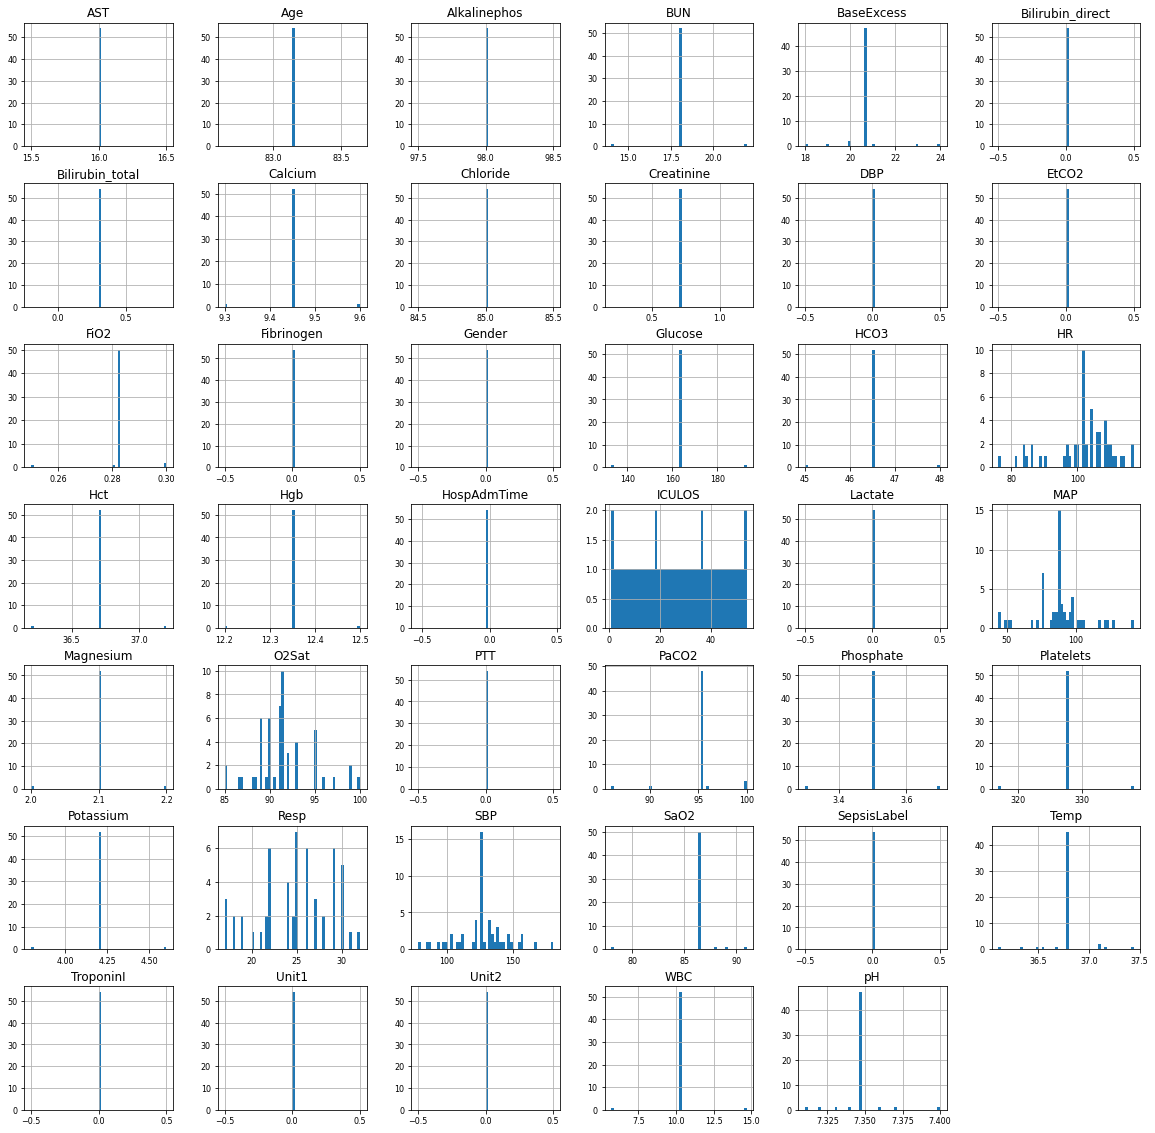

In [0]:
#Visualizamos todos los histogramas a la vez
df3.hist(figsize = (20,20), bins= 50, xlabelsize=8, ylabelsize=8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

<Figure size 432x288 with 0 Axes>

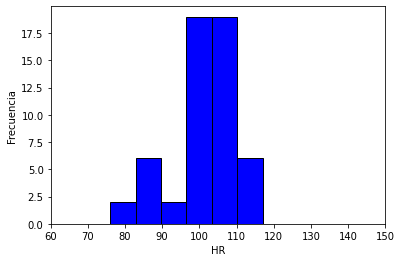

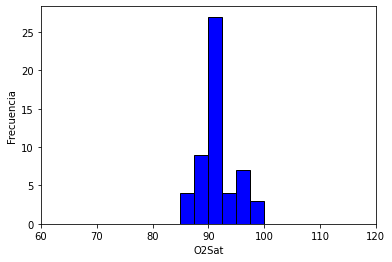

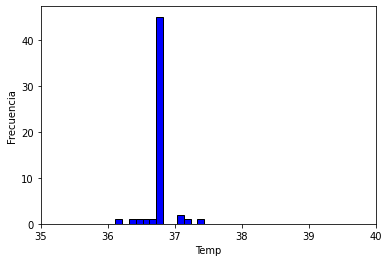

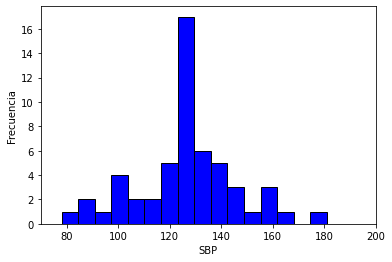

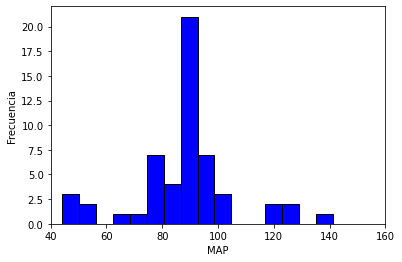

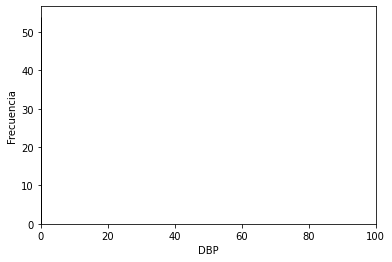

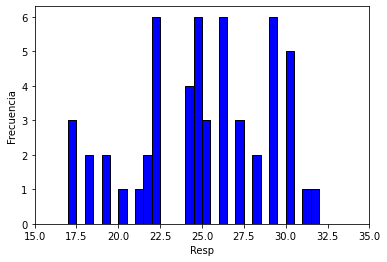

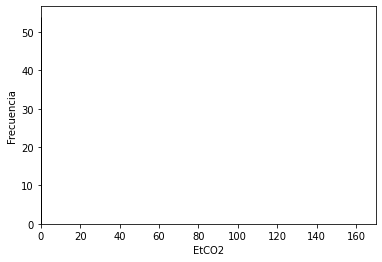

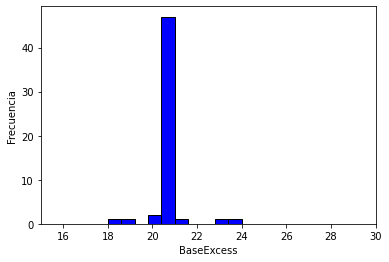

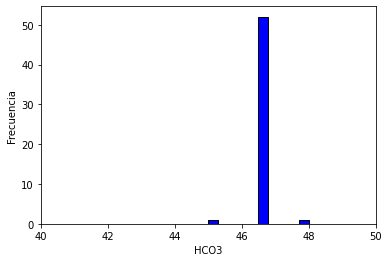

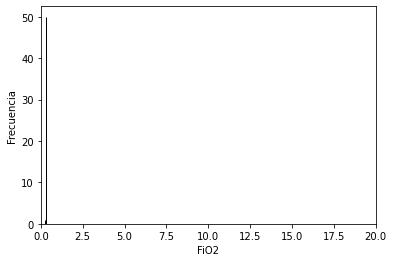

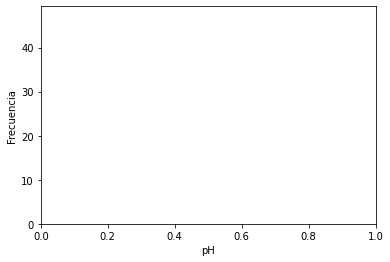

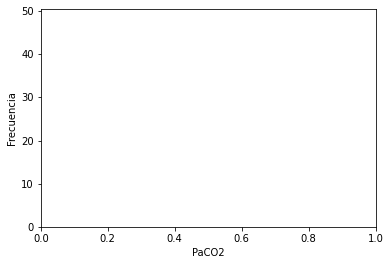

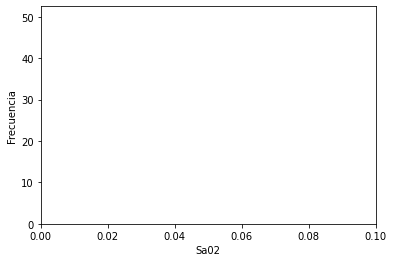

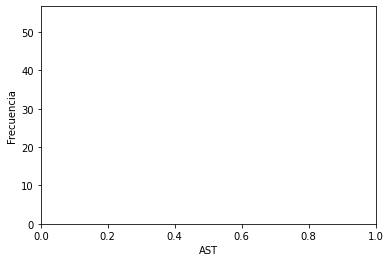

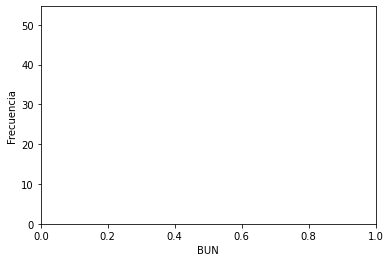

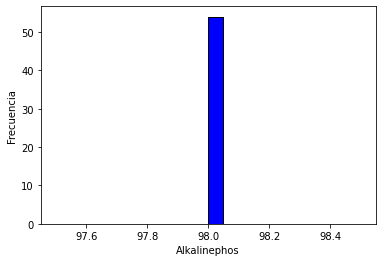

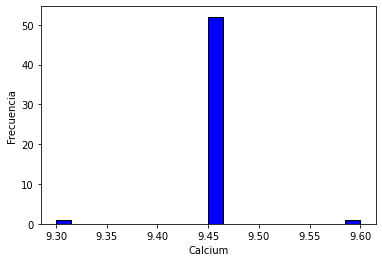

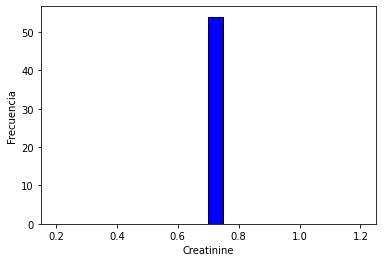

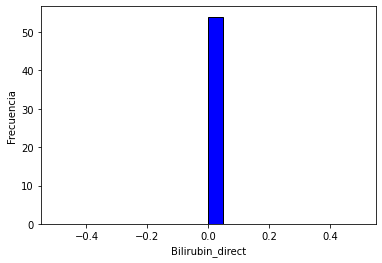

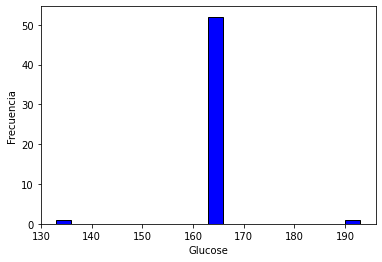

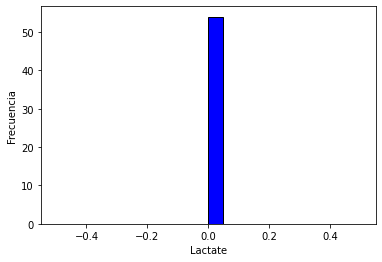

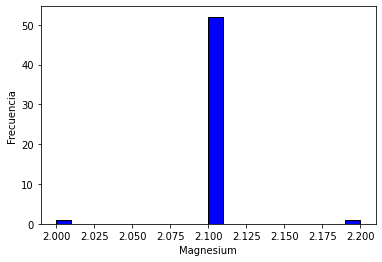

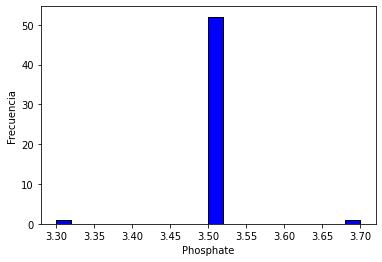

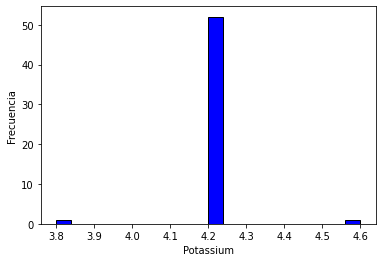

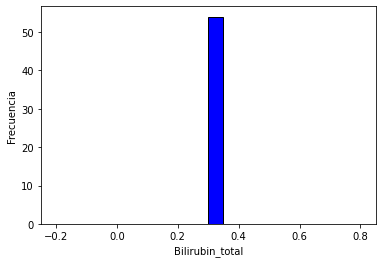

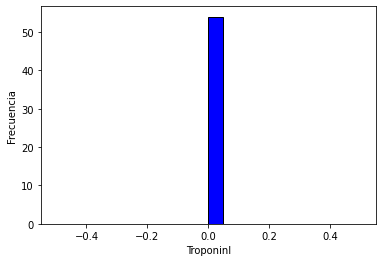

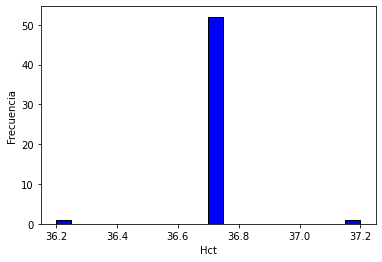

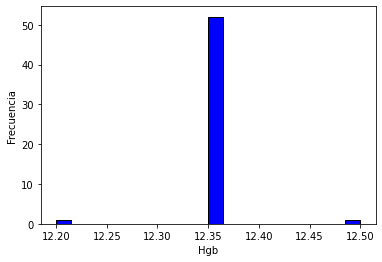

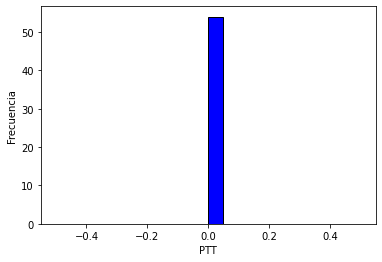

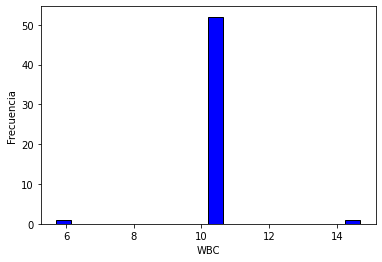

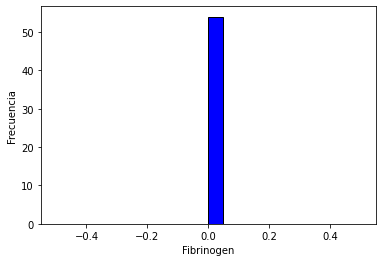

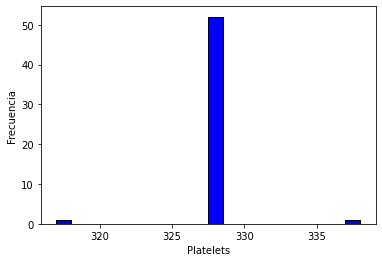

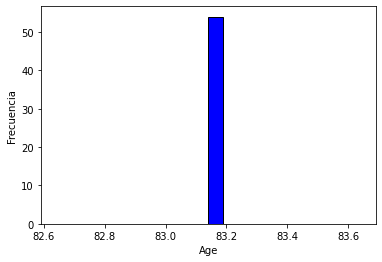

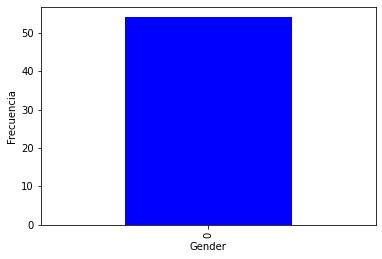

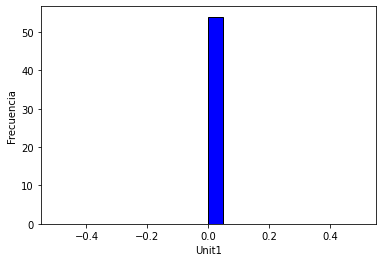

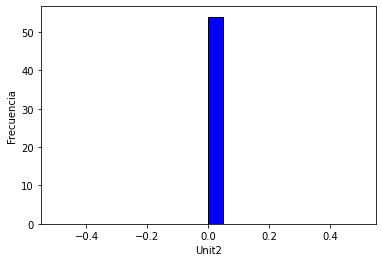

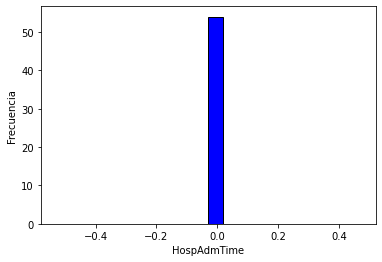

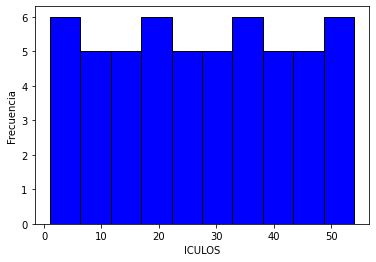

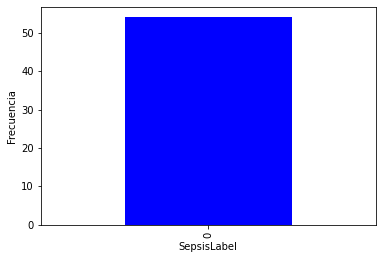

<Figure size 432x288 with 0 Axes>

In [0]:
#Representamos el histograma de cada variable con un número de bins (intervalos de la variable) según los datos


HR.plot.hist(bins=6, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('HR')
plt.ylabel('Frecuencia')
plt.xlim(60,150)
plt.figure()

O2Sat.plot.hist(bins=6, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('O2Sat')
plt.ylabel('Frecuencia')
plt.xlim(60,120)
plt.figure()

Temp.plot.hist(bins=13, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Temp')
plt.ylabel('Frecuencia')
plt.xlim(35,40)
plt.figure()

SBP.plot.hist(bins=16, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('SBP')
plt.ylabel('Frecuencia')
plt.xlim(70,200)
plt.figure()

MAP.plot.hist(bins=16, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('MAP')
plt.ylabel('Frecuencia')
plt.xlim(40,160)
plt.figure()

DBP.plot.hist(bins=9, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('DBP')
plt.ylabel('Frecuencia')
plt.xlim(0,100)
plt.figure()

Resp.plot.hist(bins=30, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Resp')
plt.ylabel('Frecuencia')
plt.xlim(15,35)
plt.figure()

EtCO2.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('EtCO2')
plt.ylabel('Frecuencia')
plt.xlim(0,170)
plt.figure()

BaseExcess.plot.hist(bins=10, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('BaseExcess')
plt.ylabel('Frecuencia')
plt.xlim(15,30)
plt.figure()

HCO3.plot.hist(bins=10, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('HCO3')
plt.ylabel('Frecuencia')
plt.xlim(40,50)
plt.figure()

FiO2.plot.hist(bins=100, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('FiO2')
plt.ylabel('Frecuencia')
plt.xlim(0,20)
plt.figure()

pH.plot.hist(bins=500, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('pH')
plt.ylabel('Frecuencia')
plt.xlim(0,1)
plt.figure()

PaCO2.plot.hist(bins=100, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('PaCO2')
plt.ylabel('Frecuencia')
plt.xlim(0,1)
plt.figure()

Sa02.plot.hist(bins=500, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Sa02')
plt.ylabel('Frecuencia')
plt.xlim(0,0.1)
plt.figure()

AST.plot.hist(bins=10, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('AST')
plt.ylabel('Frecuencia')
plt.xlim(0,1)
plt.figure()

BUN.plot.hist(bins=10, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('BUN')
plt.ylabel('Frecuencia')
plt.xlim(0,1)
plt.figure()

Alkalinephos.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Alkalinephos')
plt.ylabel('Frecuencia')
plt.figure()

Calcium.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Calcium')
plt.ylabel('Frecuencia')
plt.figure()

Creatinine.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Creatinine')
plt.ylabel('Frecuencia')
plt.figure()

Bilirubin_direct.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Bilirubin_direct')
plt.ylabel('Frecuencia')
plt.figure()

Glucose.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.figure()

Lactate.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Lactate')
plt.ylabel('Frecuencia')
plt.figure()

Magnesium.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Magnesium')
plt.ylabel('Frecuencia')
plt.figure()

Phosphate.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Phosphate')
plt.ylabel('Frecuencia')
plt.figure()

Potassium.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Potassium')
plt.ylabel('Frecuencia')
plt.figure()

Bilirubin_total.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Bilirubin_total')
plt.ylabel('Frecuencia')
plt.figure()

TroponinI.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('TroponinI')
plt.ylabel('Frecuencia')
plt.figure()

Hct.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Hct')
plt.ylabel('Frecuencia')
plt.figure()

Hgb.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Hgb')
plt.ylabel('Frecuencia')
plt.figure()

PTT.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('PTT')
plt.ylabel('Frecuencia')
plt.figure()

WBC.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('WBC')
plt.ylabel('Frecuencia')
plt.figure()

Fibrinogen.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Fibrinogen')
plt.ylabel('Frecuencia')
plt.figure()

Platelets.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Platelets')
plt.ylabel('Frecuencia')
plt.figure()

Age.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.figure()

Gender.value_counts().plot.bar(color='blue')
plt.xlabel('Gender')
plt.ylabel('Frecuencia')
plt.figure()

Unit1.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Unit1')
plt.ylabel('Frecuencia')
plt.figure()

Unit2.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('Unit2')
plt.ylabel('Frecuencia')
plt.figure()

HospAdmTime.plot.hist(bins=20, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('HospAdmTime')
plt.ylabel('Frecuencia')
plt.figure()

ICULOS.plot.hist(bins=10, color='blue', edgecolor = 'black',  linewidth=1)
plt.xlabel('ICULOS')
plt.ylabel('Frecuencia')
plt.figure()

SepsisLabel.value_counts().plot.bar(color='blue')
plt.xlabel('SepsisLabel')
plt.ylabel('Frecuencia')
plt.figure()


# SEÑALES
**EJE Y -> VARIABLE **
**EJE X -> TIEMPO (1 HORA) **

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

Text(0, 0.5, 'SepsisLabel')

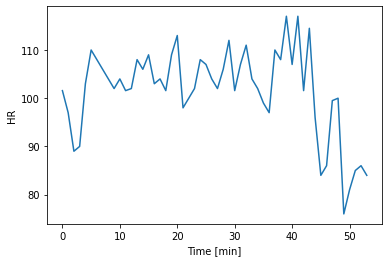

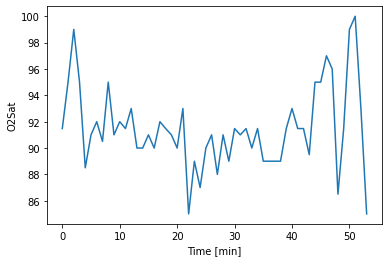

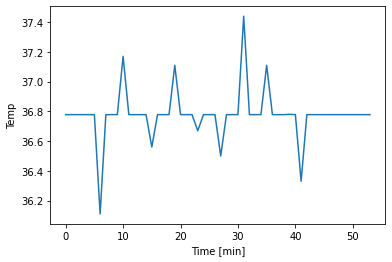

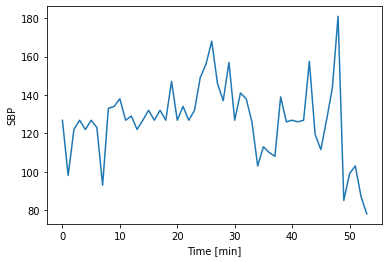

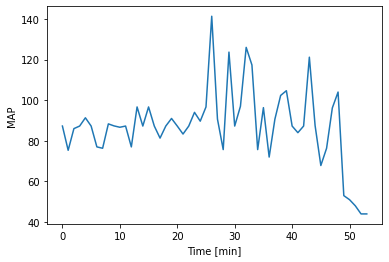

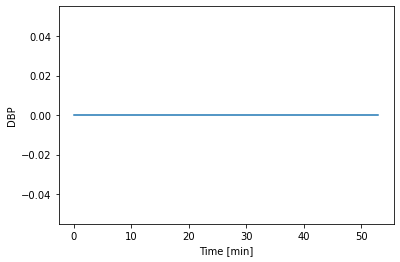

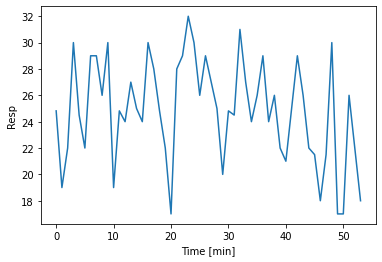

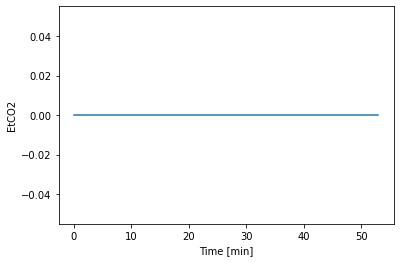

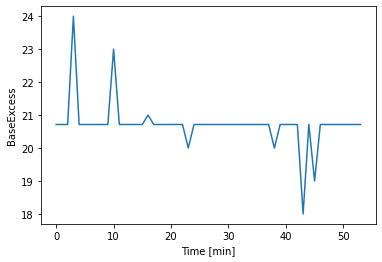

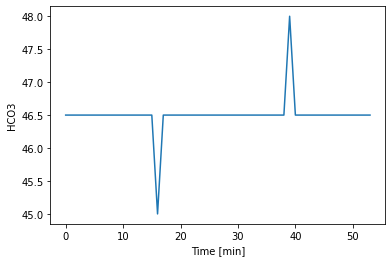

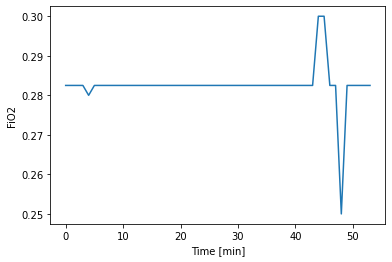

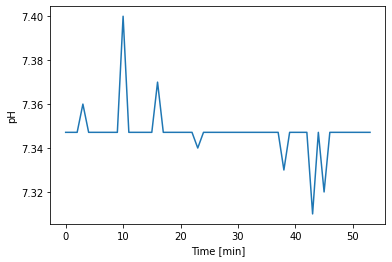

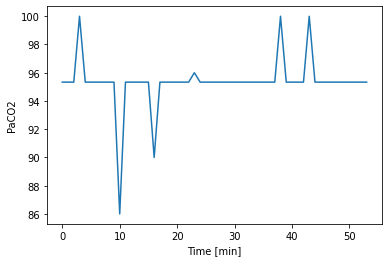

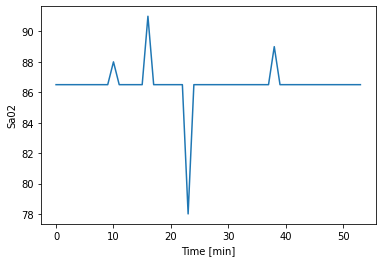

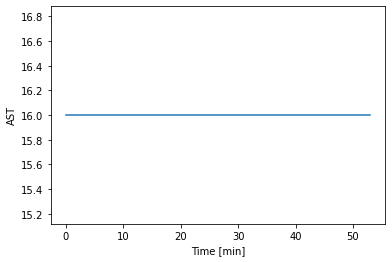

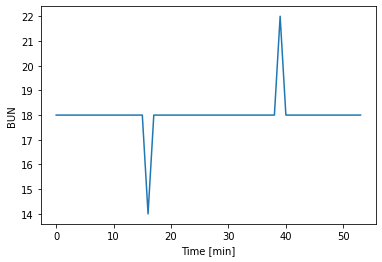

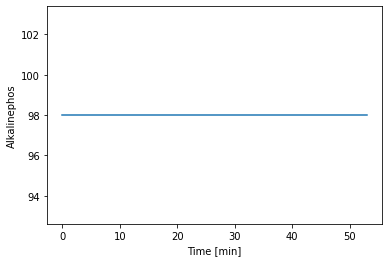

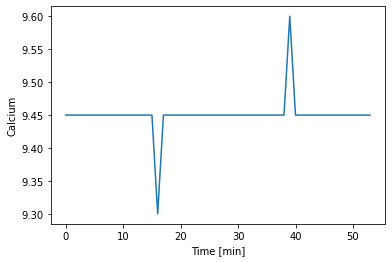

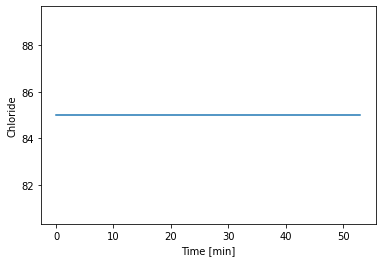

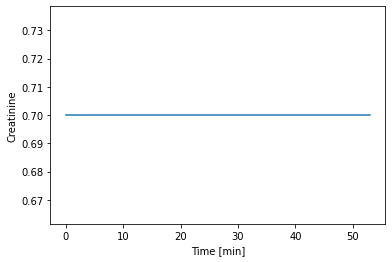

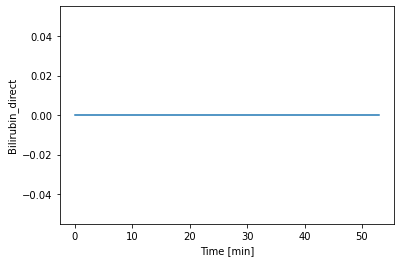

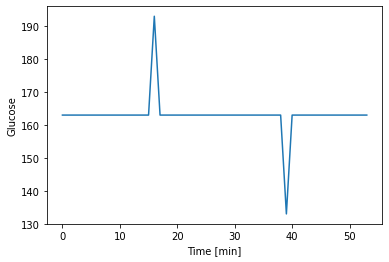

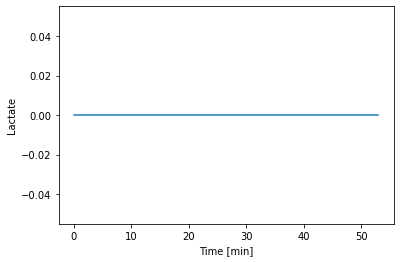

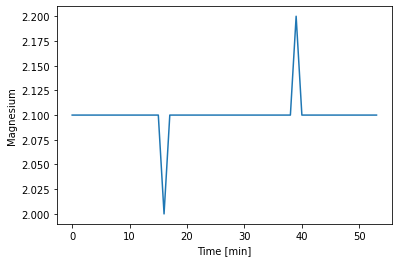

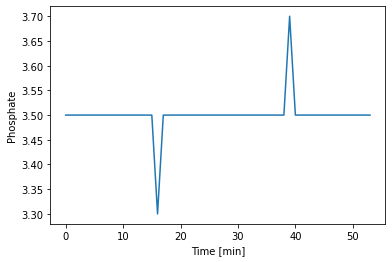

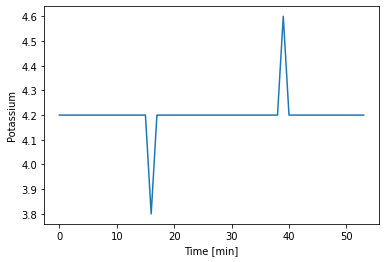

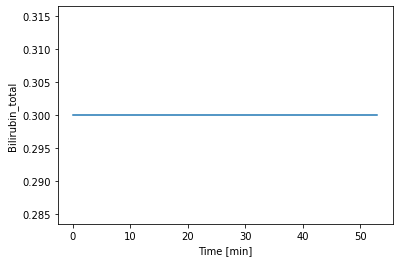

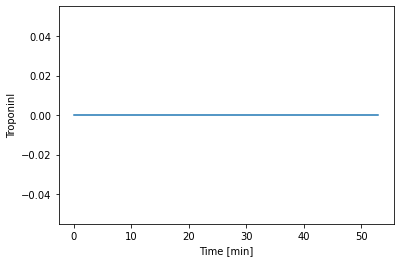

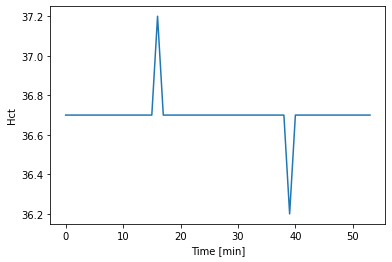

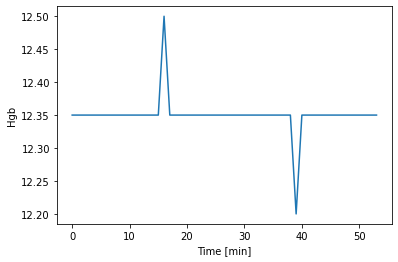

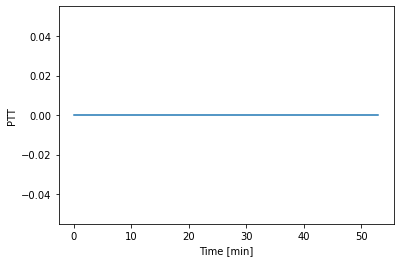

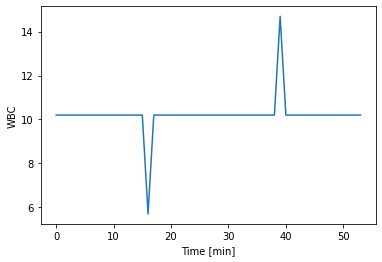

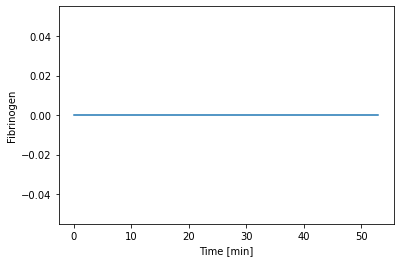

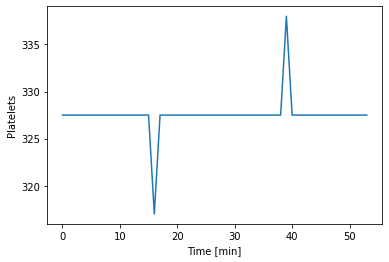

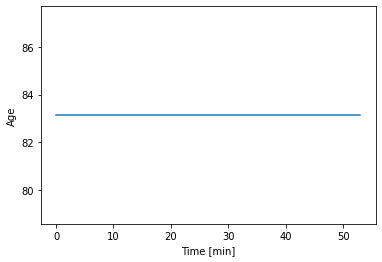

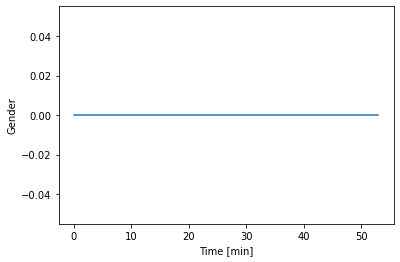

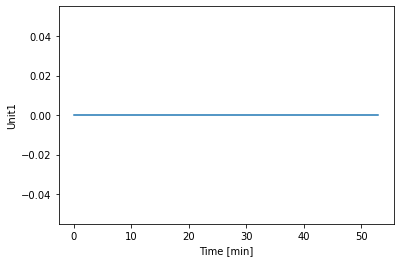

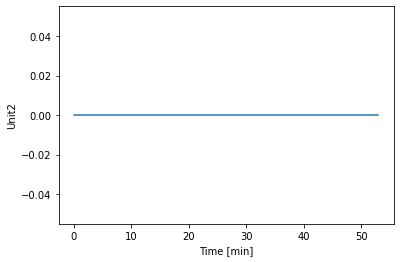

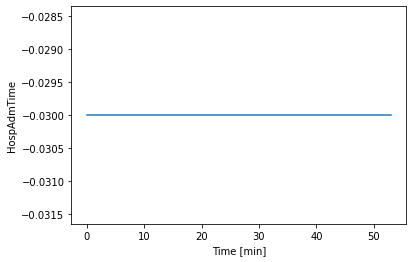

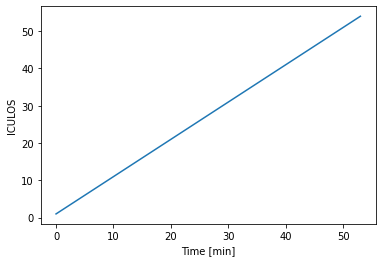

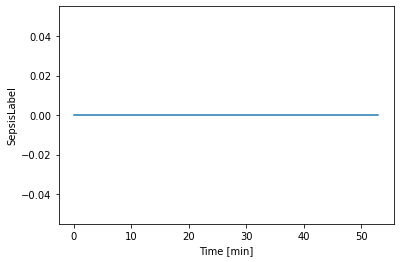

In [0]:
t = np.arange(0,len(df3)) #Creamos el eje x de tiempo con su periodo correspondiente

plt.figure()
plt.plot(t,HR)
plt.xlabel('Time [horas]')
plt.ylabel('HR')

plt.figure()
plt.plot(t,O2Sat)
plt.xlabel('Time [horas]')
plt.ylabel('O2Sat')

plt.figure()
plt.plot(t,Temp)
plt.xlabel('Time [horas]')
plt.ylabel('Temp')

plt.figure()
plt.plot(t,SBP)
plt.xlabel('Time [horas]')
plt.ylabel('SBP')

plt.figure()
plt.plot(t,MAP)
plt.xlabel('Time [horas]')
plt.ylabel('MAP')

plt.figure()
plt.plot(t,DBP)
plt.xlabel('Time [horas]')
plt.ylabel('DBP')

plt.figure()
plt.plot(t,Resp)
plt.xlabel('Time [horas]')
plt.ylabel('Resp')

plt.figure()
plt.plot(t,EtCO2)
plt.xlabel('Time [horas]')
plt.ylabel('EtCO2')

plt.figure()
plt.plot(t,BaseExcess)
plt.xlabel('Time [horas]')
plt.ylabel('BaseExcess')

plt.figure()
plt.plot(t,HCO3)
plt.xlabel('Time [horas]')
plt.ylabel('HCO3')

plt.figure()
plt.plot(t,FiO2)
plt.xlabel('Time [horas]')
plt.ylabel('FiO2')

plt.figure()
plt.plot(t,pH)
plt.xlabel('Time [horas]')
plt.ylabel('pH')

plt.figure()
plt.plot(t,PaCO2)
plt.xlabel('Time [horas]')
plt.ylabel('PaCO2')

plt.figure()
plt.plot(t,Sa02)
plt.xlabel('Time [horas]')
plt.ylabel('Sa02')

plt.figure()
plt.plot(t,AST)
plt.xlabel('Time [horas]')
plt.ylabel('AST')

plt.figure()
plt.plot(t,BUN)
plt.xlabel('Time [horas]')
plt.ylabel('BUN')

plt.figure()
plt.plot(t,Alkalinephos)
plt.xlabel('Time [horas]')
plt.ylabel('Alkalinephos')

plt.figure()
plt.plot(t,Calcium)
plt.xlabel('Time [horas]')
plt.ylabel('Calcium')

plt.figure()
plt.plot(t,Chloride)
plt.xlabel('Time [horas]')
plt.ylabel('Chloride')

plt.figure()
plt.plot(t,Creatinine)
plt.xlabel('Time [horas]')
plt.ylabel('Creatinine')

plt.figure()
plt.plot(t,Bilirubin_direct)
plt.xlabel('Time [horas]')
plt.ylabel('Bilirubin_direct')

plt.figure()
plt.plot(t,Glucose)
plt.xlabel('Time [horas]')
plt.ylabel('Glucose')

plt.figure()
plt.plot(t,Lactate)
plt.xlabel('Time [horas]')
plt.ylabel('Lactate')

plt.figure()
plt.plot(t,Magnesium)
plt.xlabel('Time [horas]')
plt.ylabel('Magnesium')

plt.figure()
plt.plot(t,Phosphate)
plt.xlabel('Time [horas]')
plt.ylabel('Phosphate')

plt.figure()
plt.plot(t,Potassium)
plt.xlabel('Time [horas]')
plt.ylabel('Potassium')

plt.figure()
plt.plot(t,Bilirubin_total)
plt.xlabel('Time [horas]')
plt.ylabel('Bilirubin_total')

plt.figure()
plt.plot(t,TroponinI)
plt.xlabel('Time [horas]')
plt.ylabel('TroponinI')

plt.figure()
plt.plot(t,Hct)
plt.xlabel('Time [horas]')
plt.ylabel('Hct')

plt.figure()
plt.plot(t,Hgb)
plt.xlabel('Time [horas]')
plt.ylabel('Hgb')

plt.figure()
plt.plot(t,PTT)
plt.xlabel('Time [horas]')
plt.ylabel('PTT')

plt.figure()
plt.plot(t,WBC)
plt.xlabel('Time [horas]')
plt.ylabel('WBC')

plt.figure()
plt.plot(t,Fibrinogen)
plt.xlabel('Time [horas]')
plt.ylabel('Fibrinogen')

plt.figure()
plt.plot(t,Platelets)
plt.xlabel('Time [horas]')
plt.ylabel('Platelets')

plt.figure()
plt.plot(t,Age)
plt.xlabel('Time [horas]')
plt.ylabel('Age')

plt.figure()
plt.plot(t,Gender)
plt.xlabel('Time [horas]')
plt.ylabel('Gender')

plt.figure()
plt.plot(t,Unit1)
plt.xlabel('Time [horas]')
plt.ylabel('Unit1')

plt.figure()
plt.plot(t,Unit2)
plt.xlabel('Time [horas]')
plt.ylabel('Unit2')

plt.figure()
plt.plot(t,HospAdmTime)
plt.xlabel('Time [horas]')
plt.ylabel('HospAdmTime')

plt.figure()
plt.plot(t,ICULOS)
plt.xlabel('Time [horas]')
plt.ylabel('ICULOS')

plt.figure()
plt.plot(t,SepsisLabel)
plt.xlabel('Time [horas]')
plt.ylabel('SepsisLabel')

## CAJAS Y BIGOTES

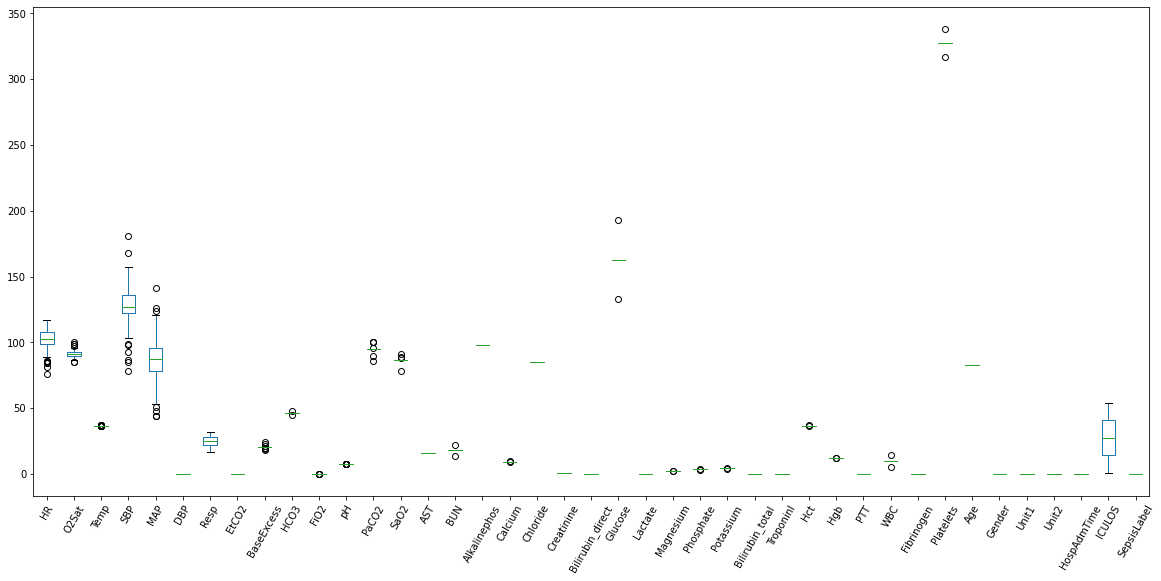

In [0]:
df3.boxplot(grid=False, rot=60,figsize= (20,9))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

<Figure size 432x288 with 0 Axes>

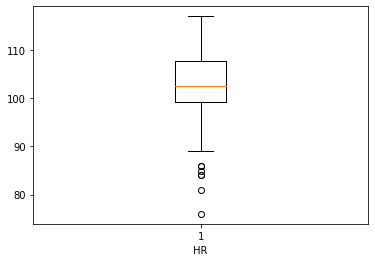

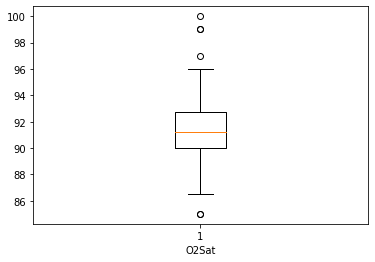

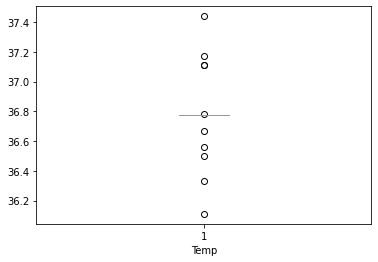

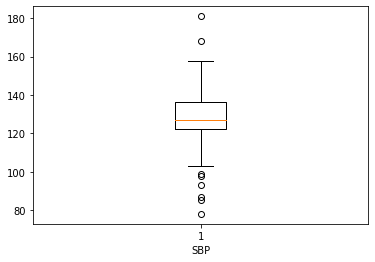

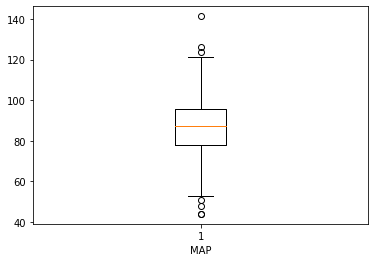

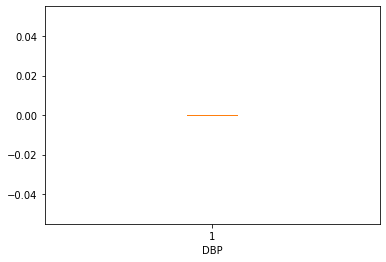

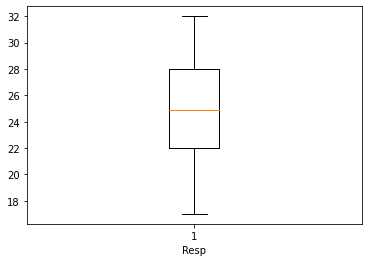

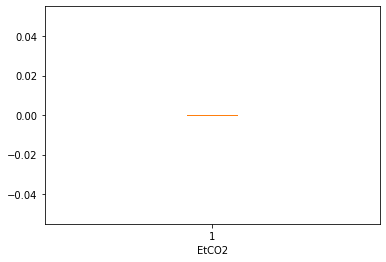

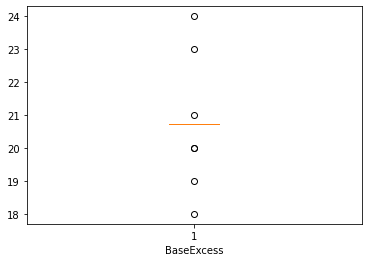

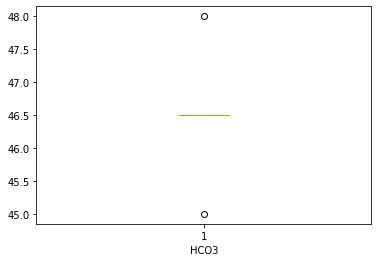

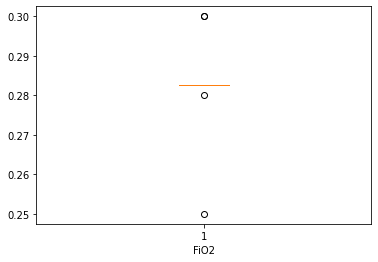

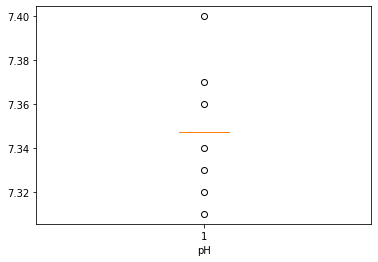

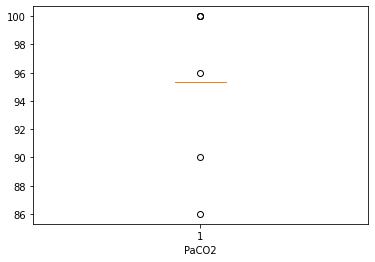

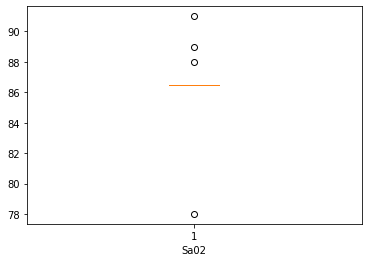

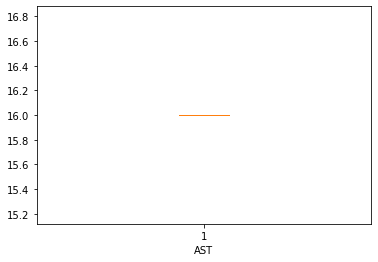

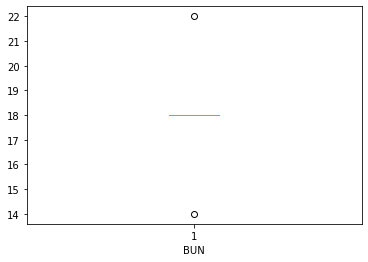

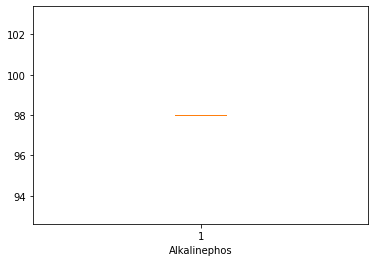

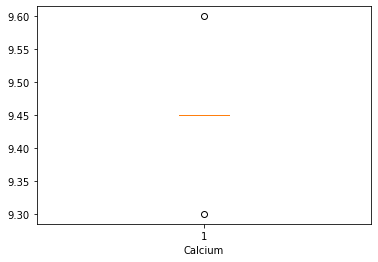

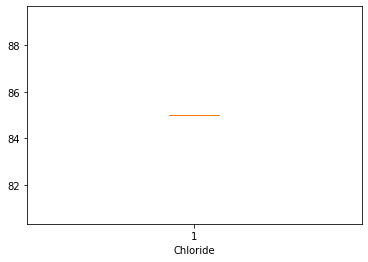

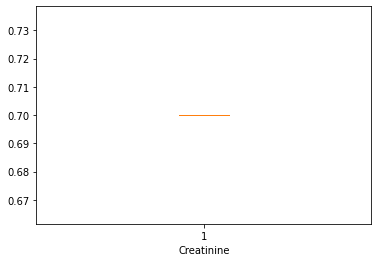

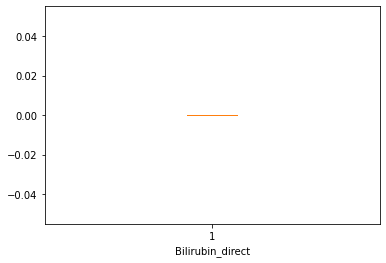

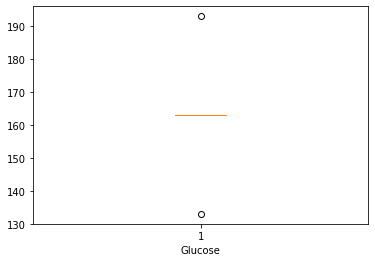

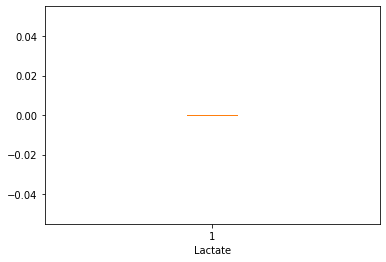

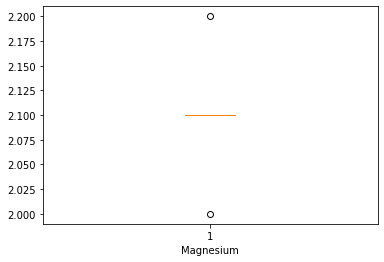

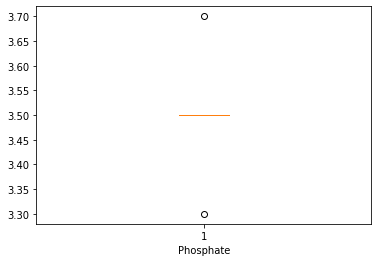

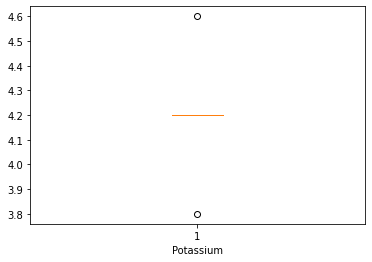

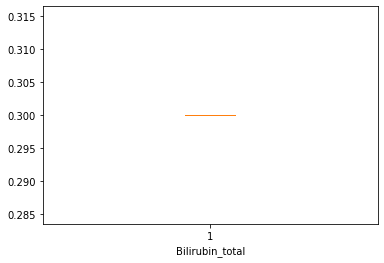

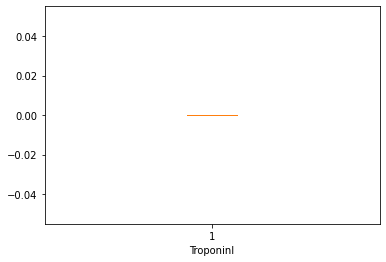

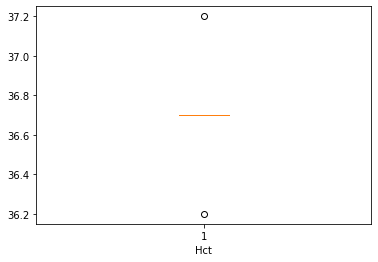

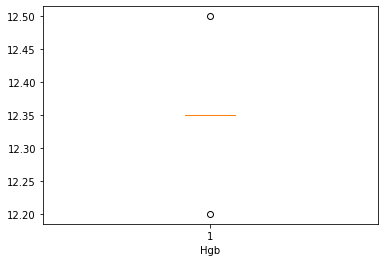

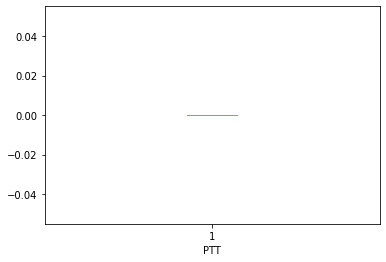

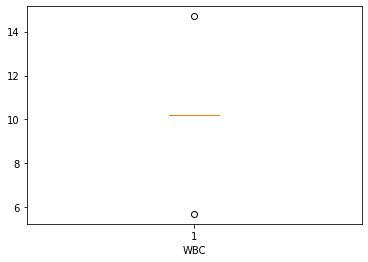

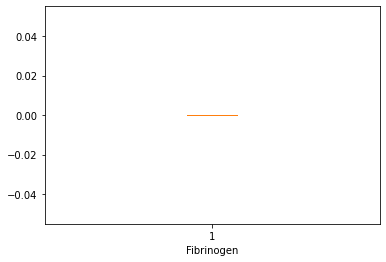

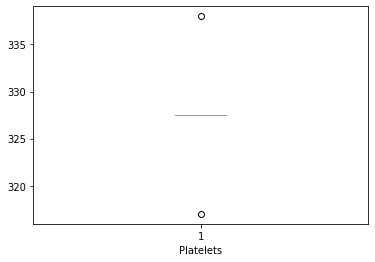

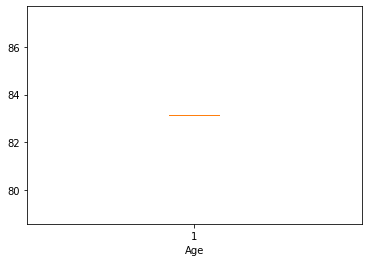

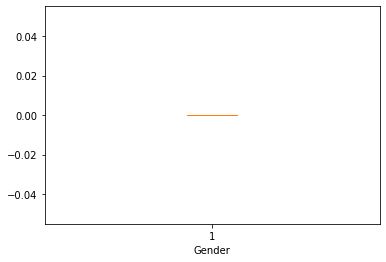

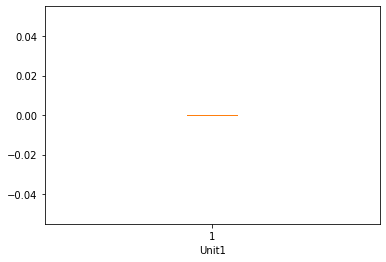

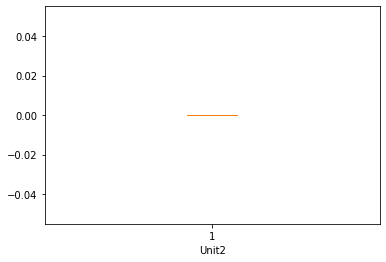

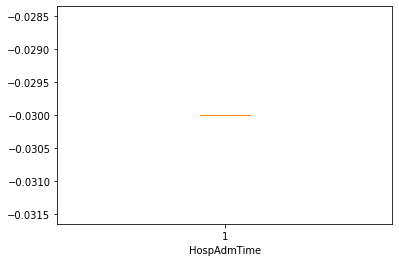

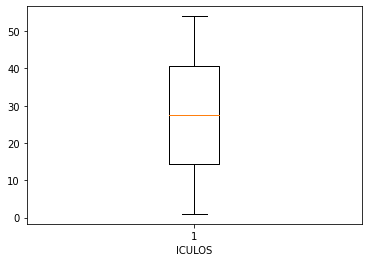

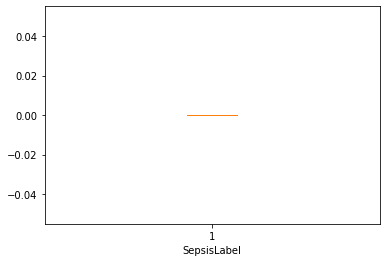

<Figure size 432x288 with 0 Axes>

In [0]:
#for i in name_list:
    #print('plt.boxplot('+i+')\nplt.xlabel("'+i+'")\nplt.figure()\n')

plt.boxplot(HR)
plt.xlabel('HR')
plt.figure()

plt.boxplot(O2Sat)
plt.xlabel('O2Sat')
plt.figure()

plt.boxplot(Temp)
plt.xlabel('Temp')
plt.figure()

plt.boxplot(SBP)
plt.xlabel('SBP')
plt.figure()

plt.boxplot(MAP)
plt.xlabel('MAP')
plt.figure()

plt.boxplot(DBP)
plt.xlabel('DBP')
plt.figure()

plt.boxplot(Resp)
plt.xlabel('Resp')
plt.figure()

plt.boxplot(EtCO2)
plt.xlabel('EtCO2')
plt.figure()

plt.boxplot(BaseExcess)
plt.xlabel('BaseExcess')
plt.figure()

plt.boxplot(HCO3)
plt.xlabel('HCO3')
plt.figure()

plt.boxplot(FiO2)
plt.xlabel('FiO2')
plt.figure()

plt.boxplot(pH)
plt.xlabel('pH')
plt.figure()

plt.boxplot(PaCO2)
plt.xlabel('PaCO2')
plt.figure()

plt.boxplot(Sa02)
plt.xlabel('Sa02')
plt.figure()

plt.boxplot(AST)
plt.xlabel('AST')
plt.figure()

plt.boxplot(BUN)
plt.xlabel('BUN')
plt.figure()

plt.boxplot(Alkalinephos)
plt.xlabel('Alkalinephos')
plt.figure()

plt.boxplot(Calcium)
plt.xlabel('Calcium')
plt.figure()

plt.boxplot(Chloride)
plt.xlabel('Chloride')
plt.figure()

plt.boxplot(Creatinine)
plt.xlabel('Creatinine')
plt.figure()

plt.boxplot(Bilirubin_direct)
plt.xlabel('Bilirubin_direct')
plt.figure()

plt.boxplot(Glucose)
plt.xlabel('Glucose')
plt.figure()

plt.boxplot(Lactate)
plt.xlabel('Lactate')
plt.figure()

plt.boxplot(Magnesium)
plt.xlabel('Magnesium')
plt.figure()

plt.boxplot(Phosphate)
plt.xlabel('Phosphate')
plt.figure()

plt.boxplot(Potassium)
plt.xlabel('Potassium')
plt.figure()

plt.boxplot(Bilirubin_total)
plt.xlabel('Bilirubin_total')
plt.figure()

plt.boxplot(TroponinI)
plt.xlabel('TroponinI')
plt.figure()

plt.boxplot(Hct)
plt.xlabel('Hct')
plt.figure()

plt.boxplot(Hgb)
plt.xlabel('Hgb')
plt.figure()

plt.boxplot(PTT)
plt.xlabel('PTT')
plt.figure()

plt.boxplot(WBC)
plt.xlabel('WBC')
plt.figure()

plt.boxplot(Fibrinogen)
plt.xlabel('Fibrinogen')
plt.figure()

plt.boxplot(Platelets)
plt.xlabel('Platelets')
plt.figure()

plt.boxplot(Age)
plt.xlabel('Age')
plt.figure()

plt.boxplot(Gender)
plt.xlabel('Gender')
plt.figure()

plt.boxplot(Unit1)
plt.xlabel('Unit1')
plt.figure()

plt.boxplot(Unit2)
plt.xlabel('Unit2')
plt.figure()

plt.boxplot(HospAdmTime)
plt.xlabel('HospAdmTime')
plt.figure()

plt.boxplot(ICULOS)
plt.xlabel('ICULOS')
plt.figure()

plt.boxplot(SepsisLabel)
plt.xlabel('SepsisLabel')
plt.figure()



## MAPA DE CORRELACIÓN

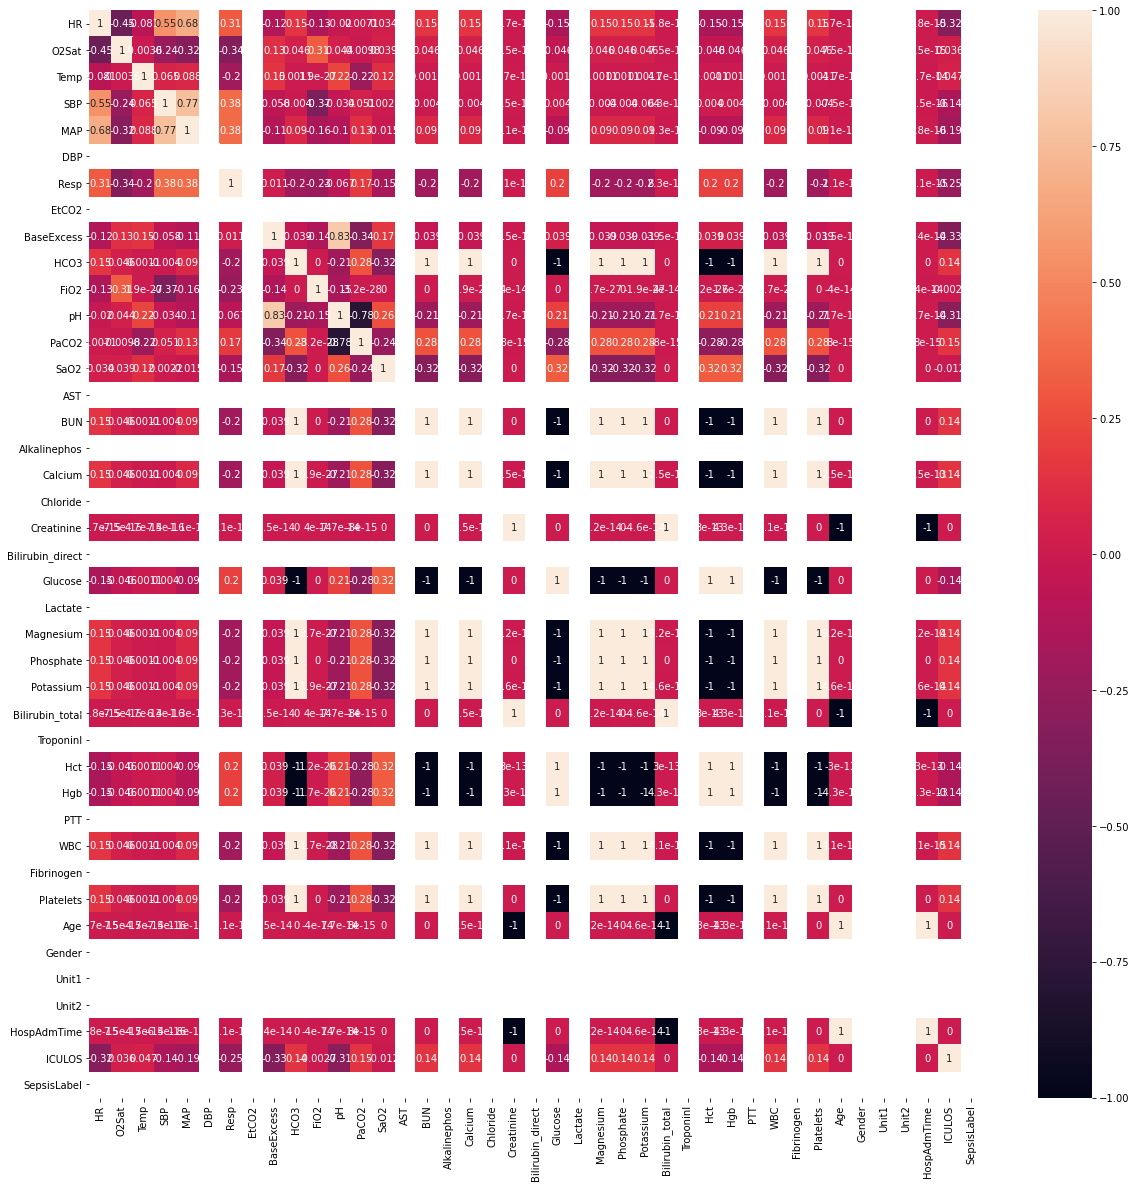

In [0]:
corr=df3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot= True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)